In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Multidimensional methods (Task2)

In [2]:
# Generating data

# For reproducible results
np.random.seed(13)

alpha = np.random.rand()
beta = np.random.rand()

x_data = np.array([k/100 for k in range(101)])

# Generate 101 random deltas with normal distribution N(0,1)
delta = np.random.randn(101)
y_data = alpha * x_data + beta + delta

In [3]:
# Functions (linear and rational)

def D_linear(params):
    a, b = params
    return np.sum((a * x_data + b - y_data) ** 2)

def D_rational(params):
    a, b = params
    return np.sum((a / (1 + b * x_data) - y_data) ** 2)

In [4]:
# Exhaustive search

def exhaustive_search_multi(f, bounds, epsilon=0.001):
    a, b = bounds
    dist = b[0]-a[0]
    n = int(dist/epsilon) + 1 
    f_min = float('inf')
    a_min, b_min = None, None
    iteration_count = 0
    f_calc = 0

    for i in np.linspace(a[0], b[0], n):
        for j in np.linspace(a[1], b[1], n):
            iteration_count += 1       # increment the iteration count
            f_calc += 1                # increment the function calculation count
            val = f((i, j))
            if val < f_min:
                f_min = val
                a_min, b_min = i, j
    a_min = round(a_min, 3)
    b_min = round(b_min, 3)
                
    return a_min, b_min, iteration_count, f_calc


In [5]:
# Gauss 

def direct_search_1D(f, a, b, epsilon=0.001):
    best_val = float('inf')
    best_x = None
    f_calc = 0

    for x in np.linspace(a, b, int(1/epsilon) + 1):
        f_calc += 1
        val = f(x)
        if val < best_val:
            best_val = val
            best_x = x

    return best_x, f_calc

def gauss(f, init, epsilon=0.001):
    a, b = init
    a_prev, b_prev = float('inf'), float('inf')
    iter_count = 0
    f_calc = 0
    prev_value = float('inf')

    while 0==0:
        iter_count += 1

        # Optimize a with fixed b
        a, f_calcs_a = direct_search_1D(lambda a_val: f((a_val, b)), a-epsilon, a+epsilon, epsilon)
        f_calc += f_calcs_a

        # Optimize b with fixed a
        b, f_calcs_b = direct_search_1D(lambda b_val: f((a, b_val)), b-epsilon, b+epsilon, epsilon)
        f_calc += f_calcs_b

        # New stopping condition: if function value difference is very small
        current_value = f((a,b))
        if np.abs(current_value - prev_value) < epsilon:
            break
            
        prev_value = current_value
        # Update previous values
        a_prev, b_prev = a, b
    
    a = round(a,3)
    b = round(b,3)

    return a, b, iter_count, f_calc


In [6]:
# Nelder Mead

from scipy.optimize import minimize
# Use an existing function with specification of the method

init_guess = [0, 0]

result_linear_nelder = minimize(D_linear, init_guess, method='Nelder-Mead')
result_rational_nelder = minimize(D_rational, init_guess, method='Nelder-Mead')

# Result to compare

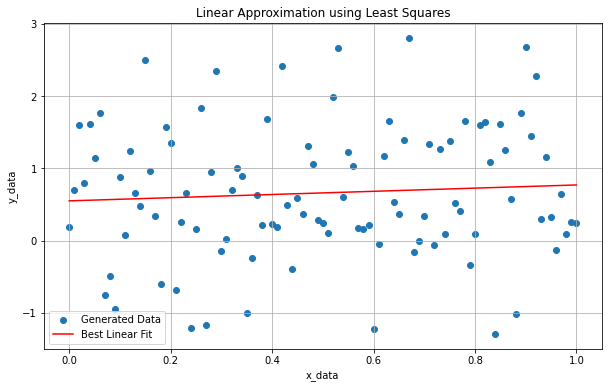

Optimal parameter: a = 0.22032896307706695
Optimal parameter: b = 0.5496033381944222


In [7]:
# Best approximation available to compare our results (Linear)
A = np.vstack([x_data, np.ones(len(x_data))]).T
a, b = np.linalg.lstsq(A, y_data, rcond=None)[0]

# Plot the data and the best-fitting line
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Generated Data")
plt.plot(x_data, a * x_data + b, 'r', label="Best Linear Fit")
plt.legend()
plt.xlabel("x_data")
plt.ylabel("y_data")
plt.title("Linear Approximation using Least Squares")
plt.grid(True)
plt.show()

print('Optimal parameter: a =', a)
print('Optimal parameter: b =', b)

a_r_l = a
b_r_l = b

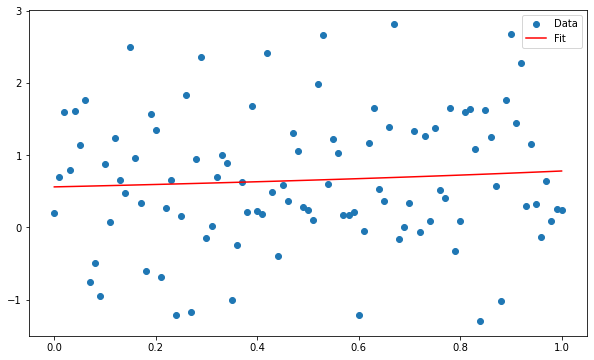

Optimal parameter: a = 0.5617564140782568
Optimal parameter: b = -0.2815067087808597


In [8]:
# Best approximation available to compare our results (Rational)
def rational(x, a, b):
    return a / (1 + b * x)

# Use curve_fit to fit the function to the data
params, covariance = curve_fit(rational, x_data, y_data)

a, b = params
y_fit = rational(x_data, a, b)

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, y_fit, 'r-', label='Fit')
plt.legend()
plt.show()

print('Optimal parameter: a =', a)
print('Optimal parameter: b =', b)

a_r_r = a
b_r_r = b

# Exhaustive search results

Results for D_linear with Exhaustive Search:
Optimal parameter: a = 0.22
Optimal parameter: b = 0.55
Number of iterations:  4004001
Function evaluations:  4004001


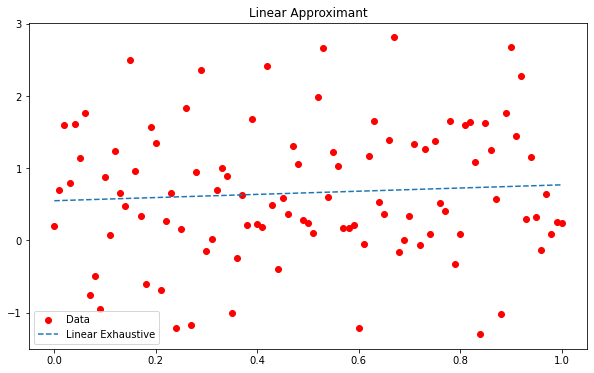

In [9]:
# Exhaustive search for linear function
a_exhaustive_linear, b_exhaustive_linear, iteration_count_exh_l, f_calc_exh_l = exhaustive_search_multi(D_linear, ([-1, -1], [1, 1]), 0.001) 

# Print the results from exhaustive search
print("Results for D_linear with Exhaustive Search:")
print("Optimal parameter: a =", a_exhaustive_linear)
print("Optimal parameter: b =", b_exhaustive_linear)
print("Number of iterations: ", iteration_count_exh_l)
print("Function evaluations: ", f_calc_exh_l)

# Plot for Linear Approximant
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_data, a_exhaustive_linear * x_data + b_exhaustive_linear, label='Linear Exhaustive', linestyle='--') 
plt.title('Linear Approximant')
plt.legend()
plt.show()

/var/folders/0c/dbhfvsdx3t32whvxj57y1wqh0000gp/T/ipykernel_69749/3698975523.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum((a / (1 + b * x_data) - y_data) ** 2)
/var/folders/0c/dbhfvsdx3t32whvxj57y1wqh0000gp/T/ipykernel_69749/3698975523.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum((a / (1 + b * x_data) - y_data) ** 2)


Results for D_rational with Exhaustive Search:
Optimal parameter: a = 0.562
Optimal parameter: b = -0.281
Number of iterations:  4004001
Function evaluations:  4004001


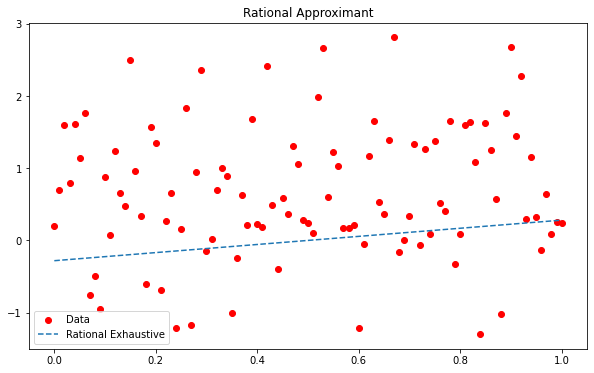

In [10]:
# Exhaustive search for rational function
a_exhaustive_rational, b_exhaustive_rational, iteration_count_exh_r, f_calc_exh_r = exhaustive_search_multi(D_rational, ([-1, -1], [1, 1]), 0.001) 

# Print the results from exhaustive search
print("Results for D_rational with Exhaustive Search:")
print("Optimal parameter: a =", a_exhaustive_rational)
print("Optimal parameter: b =", b_exhaustive_rational)
print("Number of iterations: ", iteration_count_exh_r)
print("Function evaluations: ", f_calc_exh_r)

# Plot for Linear Approximant
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_data, a_exhaustive_rational * x_data + b_exhaustive_rational, label='Rational Exhaustive', linestyle='--') 
plt.title('Rational Approximant')
plt.legend()
plt.show()

# Gauss (coordinate descent) method results

Results for D_linear with Gauss method:
Optimal parameters: a = 0.278 , b = 0.521
Number of iterations:  458
Function evaluations:  916916


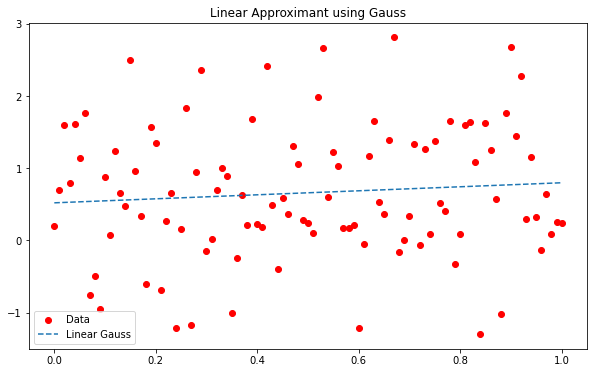

In [11]:
# Gauss search for linear function
a_gauss_linear, b_gauss_linear, iteration_count_gauss_l, f_calc_gauss_l = gauss(D_linear, [0.1, 0.1])

# Print the results from Gauss
print("Results for D_linear with Gauss method:")
print("Optimal parameters: a =", a_gauss_linear, ", b =", b_gauss_linear)
print("Number of iterations: ", iteration_count_gauss_l)
print("Function evaluations: ", f_calc_gauss_l)

# Plot for Linear Approximant
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='red')

# Plotting results from Gauss
plt.plot(x_data, a_gauss_linear * x_data + b_gauss_linear, label='Linear Gauss', linestyle='--') 
plt.title('Linear Approximant using Gauss')
plt.legend()
plt.show()

Results for D_linear with Gauss method:
Optimal parameters: a = 0.539 , b = -0.337
Number of iterations:  582
Function evaluations:  1165164


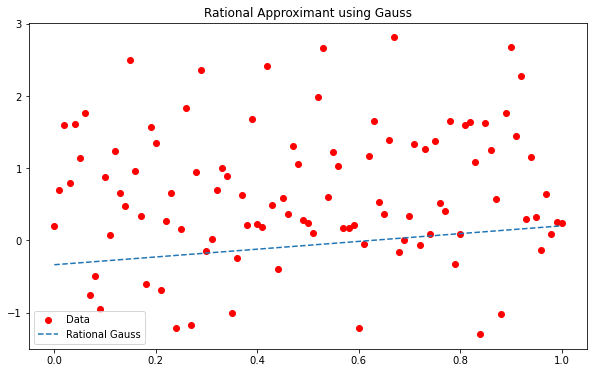

In [12]:
# Gauss search for rational function
a_gauss_rational, b_gauss_rational, iteration_count_gauss_r, f_calc_gauss_r = gauss(D_rational, [0, 0])

# Print the results from Gauss
print("Results for D_linear with Gauss method:")
print("Optimal parameters: a =", a_gauss_rational, ", b =", b_gauss_rational)
print("Number of iterations: ", iteration_count_gauss_r)
print("Function evaluations: ", f_calc_gauss_r)

# Plot for Linear Approximant
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='red')

# Plotting results from Gauss
plt.plot(x_data, a_gauss_rational * x_data + b_gauss_rational, label='Rational Gauss', linestyle='--') 
plt.title('Rational Approximant using Gauss')
plt.legend()
plt.show()

# Nelder-Mead method results

Optimal parameters using Nelder-Mead for D_linear: a = 0.22039588492089476 , b = 0.5495495627314815
Number of iterations: 60
Number of function evaluations: 115


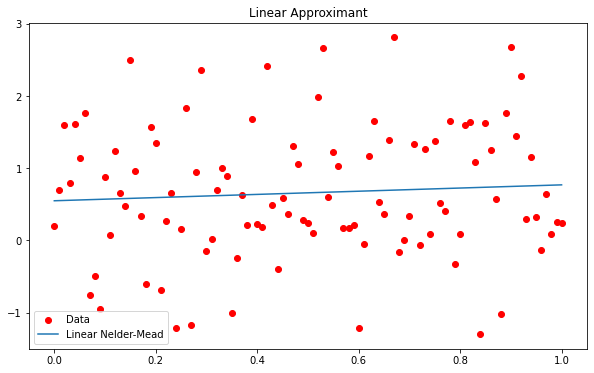

In [13]:
# Nelder-Mead method for linear function
print("Optimal parameters using Nelder-Mead for D_linear: a =", result_linear_nelder.x[0], ", b =", result_linear_nelder.x[1])
print("Number of iterations:", result_linear_nelder.nit)
print("Number of function evaluations:", result_linear_nelder.nfev)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_data, result_linear_nelder.x[0] * x_data + result_linear_nelder.x[1], label='Linear Nelder-Mead')
plt.title('Linear Approximant')
plt.legend()
plt.show()

Optimal parameters using Nelder-Mead for D_rational: a = 0.5617551005741965 , b = -0.28152670639507615
Number of iterations: 60
Number of function evaluations: 115


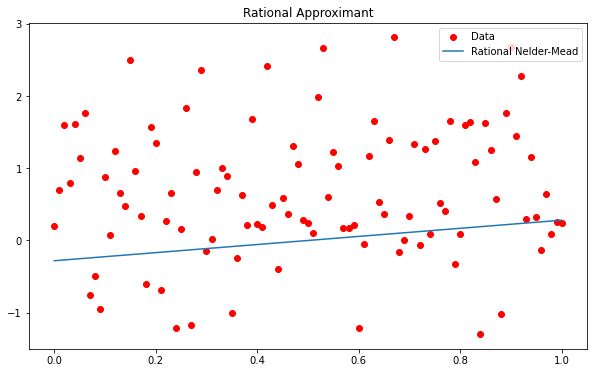

In [14]:
# Nelder-Mead method for rational function
print("Optimal parameters using Nelder-Mead for D_rational: a =", result_rational_nelder.x[0], ", b =", result_rational_nelder.x[1])
print("Number of iterations:", result_rational_nelder.nit)
print("Number of function evaluations:", result_rational_nelder.nfev)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_data, result_rational_nelder.x[0] * x_data + result_rational_nelder.x[1], label='Rational Nelder-Mead')
plt.title('Rational Approximant')
plt.legend()
plt.show()

# Plotting together + table

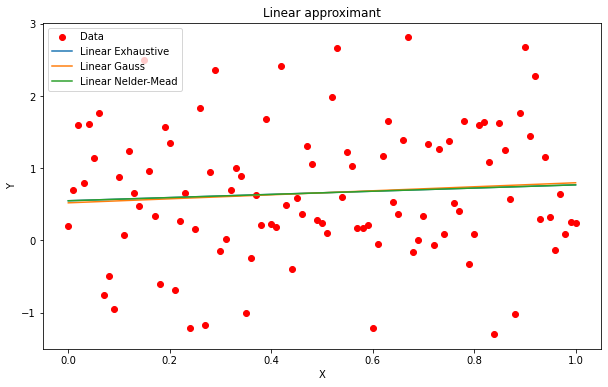

In [15]:
plt.figure(figsize=(10,6))
plt.title("Linear approximant")
plt.scatter(x_data, y_data, label='Data', color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_data, a_exhaustive_linear * x_data + b_exhaustive_linear, label='Linear Exhaustive') 
plt.plot(x_data, a_gauss_linear * x_data + b_gauss_linear, label='Linear Gauss') 
plt.plot(x_data, result_linear_nelder.x[0] * x_data + result_linear_nelder.x[1], label='Linear Nelder-Mead')
plt.legend()
plt.show()

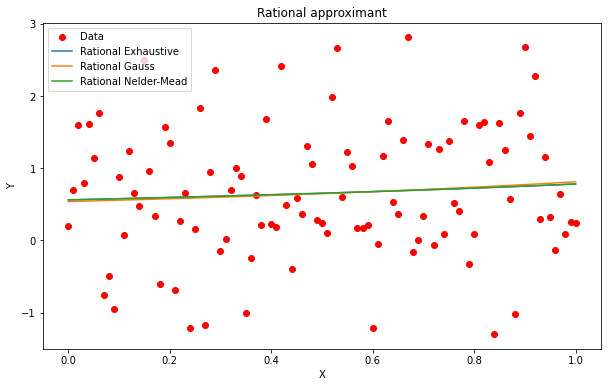

In [16]:
plt.figure(figsize=(10,6))
plt.title("Rational approximant")
plt.scatter(x_data, y_data, label='Data', color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_data, a_exhaustive_rational / (1 + x_data * b_exhaustive_rational), label='Rational Exhaustive') 
plt.plot(x_data, a_gauss_rational / (1 + x_data * b_gauss_rational), label='Rational Gauss')  
plt.plot(x_data, result_rational_nelder.x[0] / (1 + x_data * result_rational_nelder.x[1]), label='Rational Nelder-Mead')
plt.legend()
plt.show()

In [17]:
a_list_linear = [a_r_l, a_exhaustive_linear, a_gauss_linear, result_linear_nelder.x[0]]
b_list_linear = [b_r_l, b_exhaustive_linear, b_gauss_linear, result_linear_nelder.x[1]]
a_list_rational = [a_r_r, a_exhaustive_rational, a_gauss_rational, result_rational_nelder.x[0]]
b_list_rational = [b_r_r, b_exhaustive_rational, b_gauss_rational, result_rational_nelder.x[1]]

iterations_l = [iteration_count_exh_l, iteration_count_gauss_l, result_linear_nelder.nit]
iterations_r = [iteration_count_exh_r, iteration_count_gauss_r, result_rational_nelder.nit]

f_calc_l = [f_calc_exh_l, f_calc_gauss_l, result_linear_nelder.nfev]
f_calc_r = [f_calc_exh_r, f_calc_gauss_r, result_rational_nelder.nfev]

import pandas as pd
data1 = {
    'a_linear': a_list_linear,
    'b_linear': b_list_linear,
    'a_rational': a_list_rational,
    'b_rational': b_list_rational
}

rows1 = ["Real coeffs", "Exhaustive", "Gauss", "Nelder-Mead"]

table1 = pd.DataFrame(data1, index=rows1)
print(table1)

data2 = {
    'iter_linear': iterations_l,
    'f_eval_linear': f_calc_l,
    'iter_rational': iterations_r,
    'f_eval_rational': f_calc_r
}

rows2 = ["Exhaustive", "Gauss", "Nelder-Mead"]

table2 = pd.DataFrame(data2, index=rows2)
print(table2)


             a_linear  b_linear  a_rational  b_rational
Real coeffs  0.220329  0.549603    0.561756   -0.281507
Exhaustive   0.220000  0.550000    0.562000   -0.281000
Gauss        0.278000  0.521000    0.539000   -0.337000
Nelder-Mead  0.220396  0.549550    0.561755   -0.281527
             iter_linear  f_eval_linear  iter_rational  f_eval_rational
Exhaustive       4004001        4004001        4004001          4004001
Gauss                458         916916            582          1165164
Nelder-Mead           60            115             60              115


# Task 3

# Vanilla Gradient Descent

In [18]:
# For the linear and rational approximant

# Gradient Functions
def gradient_linear(params):
    a, b = params
    d_da = np.sum(2 * (a * x_data + b - y_data) * x_data)
    d_db = np.sum(2 * (a * x_data + b - y_data))
    return np.array([d_da, d_db])

def gradient_rational(params):
    a, b = params
    d_da = np.sum(2 * (a / (1 + b * x_data) - y_data) * 1/(1 + b * x_data))
    d_db = np.sum(2 * (a / (1 + b * x_data) - y_data) * (-a * x_data / (1 + b * x_data)**2))
    return np.array([d_da, d_db])

def gradient_descent(D_func, gradient_func, initial_guess, learning_rate=0.007, tol=0.001, max_iter=1000):
    current_params = initial_guess
    f_evals = 0
    for iteration in range(max_iter):
        gradient = gradient_func(current_params)
        next_params = current_params - learning_rate * gradient
        f_evals += 1
        
        if np.linalg.norm(next_params - current_params) < tol:
            break
            
        current_params = next_params
        
    return current_params, iteration+1, f_evals

initial_guess_l = [2, 5]
initial_guess_r = [0, 0]
result_linear_gd, iterations_count_vgd_l, f_calc_vgd_l = gradient_descent(D_linear, gradient_linear, initial_guess_l)
result_rational_gd, iterations_count_vgd_r, f_calc_vgd_r = gradient_descent(D_rational, gradient_rational, initial_guess_r, learning_rate = 0.005)

a_linear_vgd = round(result_linear_gd[0], 3)
b_linear_vgd = round(result_linear_gd[1], 3)
a_rational_vgd = round(result_rational_gd[0], 3)
b_rational_vgd = round(result_rational_gd[1], 3)

# Conjugate Gradient Descent

In [19]:
from scipy.optimize import minimize

initial_guess = [0, 0]

result_linear_cg = minimize(D_linear, initial_guess, method='CG', tol=0.001)
result_rational_cg = minimize(D_rational, initial_guess, method='CG', tol=0.001)
result_linear_cg, result_rational_cg

a_linear_cg = round(result_linear_cg.x[0], 3)
b_linear_cg = round(result_linear_cg.x[1], 3)
a_rational_cg = round(result_rational_cg.x[0], 3)
b_rational_cg = round(result_rational_cg.x[1], 3)

# Newton's method

In [20]:
initial_guess = [0, 0]

def gradient_linear(params):
    a, b = params
    d_da = np.sum(2 * x_data * (a * x_data + b - y_data))
    d_db = np.sum(2 * (a * x_data + b - y_data))
    return np.array([d_da, d_db])

def gradient_rational(params):
    a, b = params
    d_da = np.sum(2 * (1 / (1 + b * x_data)) * (a / (1 + b * x_data) - y_data))
    d_db = np.sum(2 * (-a * x_data / (1 + b * x_data)**2) * (a / (1 + b * x_data) - y_data))
    return np.array([d_da, d_db])

result_linear_newton = minimize(D_linear, initial_guess, method='Newton-CG', jac=gradient_linear, tol=0.001)
result_rational_newton = minimize(D_rational, initial_guess, method='Newton-CG', jac=gradient_rational, tol=0.001)

a_linear_newton = round(result_linear_newton.x[0], 3)
b_linear_newton = round(result_linear_newton.x[1], 3)
a_rational_newton = round(result_rational_newton.x[0], 3)
b_rational_newton = round(result_rational_newton.x[1], 3)

# Levenberg-Marquardt Method

In [21]:
# Levenberg-Marquardt
from scipy.optimize import least_squares

def residuals_linear(params):
    a, b = params
    return a * x_data + b - y_data

def residuals_rational(params):
    a, b = params
    return a / (1 + b * x_data) - y_data

result_linear_lm = least_squares(residuals_linear, initial_guess, method='lm')
result_rational_lm = least_squares(residuals_rational, initial_guess, method='lm')

a_linear_lm = round(result_linear_lm.x[0], 3)
b_linear_lm = round(result_linear_lm.x[1], 3)
a_rational_lm = round(result_rational_lm.x[0], 3)
b_rational_lm = round(result_rational_lm.x[1], 3)

# Plots and tables

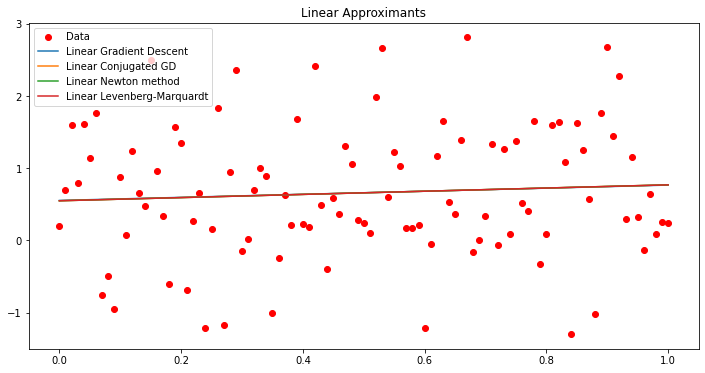

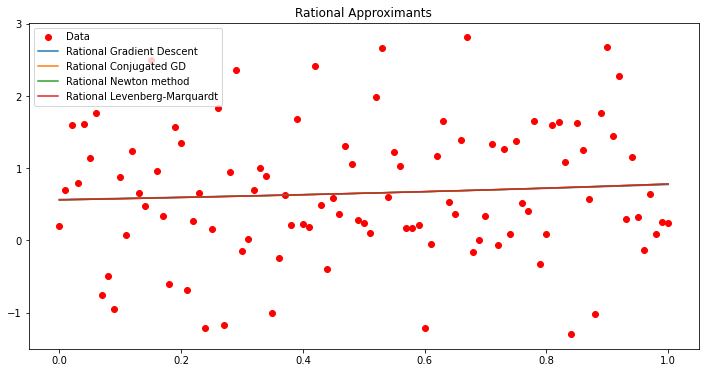

In [22]:
import matplotlib.pyplot as plt

# For Linear Approximant
plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_data, a_linear_vgd * x_data + b_linear_vgd, label='Linear Gradient Descent')
plt.plot(x_data, result_linear_cg.x[0] * x_data + result_linear_cg.x[1], label='Linear Conjugated GD')
plt.plot(x_data, result_linear_newton.x[0] * x_data + result_linear_newton.x[1], label='Linear Newton method')
plt.plot(x_data, result_linear_lm.x[0] * x_data + result_linear_lm.x[1], label='Linear Levenberg-Marquardt')
plt.legend()
plt.title('Linear Approximants')
plt.show()

# For Rational Approximant
plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_data, a_rational_vgd / (1 + b_rational_vgd * x_data), label='Rational Gradient Descent')
plt.plot(x_data, result_rational_cg.x[0] / (1 + result_rational_cg.x[1] * x_data), label='Rational Conjugated GD')
plt.plot(x_data, result_rational_newton.x[0] / (1 + result_rational_newton.x[1] * x_data), label='Rational Newton method')
plt.plot(x_data, result_rational_lm.x[0] / (1 + result_rational_lm.x[1] * x_data), label='Rational Levenberg-Marquardt')
plt.legend()
plt.title('Rational Approximants')
plt.show()

In [23]:
a_list_linear = [a_r_l, a_linear_vgd, a_linear_cg, a_linear_newton, a_linear_lm]
b_list_linear = [b_r_l, b_linear_vgd, b_linear_cg, b_linear_newton, b_linear_lm]
a_list_rational = [a_r_r, a_rational_vgd, a_rational_cg, a_rational_newton, a_rational_lm]
b_list_rational = [b_r_r, b_rational_vgd, b_rational_cg, b_rational_newton, b_rational_lm]

iterations_l = [iterations_count_vgd_l, result_linear_cg.nit, result_linear_newton.nit, "?"]
iterations_r = [iterations_count_vgd_r, result_rational_cg.nit, result_rational_newton.nit, "?"]
f_calc_l = [f_calc_vgd_l, result_linear_cg.nfev, result_linear_newton.nfev, result_linear_lm.nfev]
f_calc_r = [f_calc_vgd_r, result_rational_cg.nfev, result_rational_newton.nfev, result_rational_lm.nfev]

import pandas as pd
data3 = {
    'a_linear': a_list_linear,
    'b_linear': b_list_linear,
    'a_rational': a_list_rational,
    'b_rational': b_list_rational
}

rows3 = ["Real values", "Vanilla GD", "Conjugated GD", "Newton's", "Levenberg-M"]

table3 = pd.DataFrame(data3, index=rows3)
print(table3)

data4 = {'iter_linear': iterations_l,'f_eval_linear': f_calc_l,'iter_rational': iterations_r,'f_eval_rational': f_calc_r}

rows4 = ["Vanilla GD", "Conjugated GD", "Newton's", "Levenberg-M"]

table4 = pd.DataFrame(data4, index=rows4)
print(table4)

               a_linear  b_linear  a_rational  b_rational
Real values    0.220329  0.549603    0.561756   -0.281507
Vanilla GD     0.213000  0.554000    0.567000   -0.268000
Conjugated GD  0.220000  0.550000    0.562000   -0.282000
Newton's       0.220000  0.550000    0.562000   -0.282000
Levenberg-M    0.220000  0.550000    0.562000   -0.282000
              iter_linear  f_eval_linear iter_rational  f_eval_rational
Vanilla GD             43             43            55               55
Conjugated GD           2             15            10               75
Newton's                3              4             5                7
Levenberg-M             ?              6             ?               16


# Plotting everything together (Task 2 and 3) + 2 tables

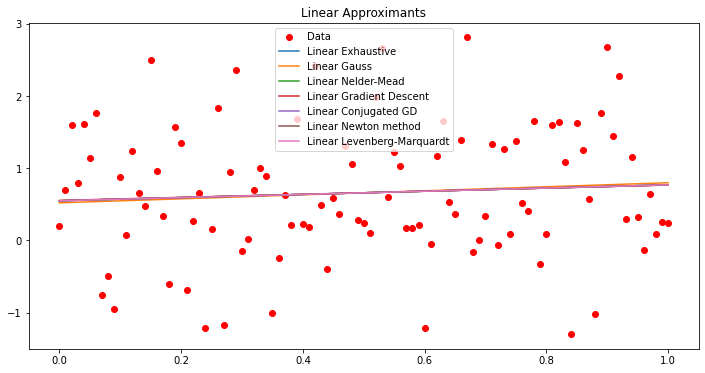

In [24]:
# For Linear Approximant
plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_data, a_exhaustive_linear * x_data + b_exhaustive_linear, label='Linear Exhaustive') 
plt.plot(x_data, a_gauss_linear * x_data + b_gauss_linear, label='Linear Gauss') 
plt.plot(x_data, result_linear_nelder.x[0] * x_data + result_linear_nelder.x[1], label='Linear Nelder-Mead')
plt.plot(x_data, a_linear_vgd * x_data + b_linear_vgd, label='Linear Gradient Descent')
plt.plot(x_data, result_linear_cg.x[0] * x_data + result_linear_cg.x[1], label='Linear Conjugated GD')
plt.plot(x_data, result_linear_newton.x[0] * x_data + result_linear_newton.x[1], label='Linear Newton method')
plt.plot(x_data, result_linear_lm.x[0] * x_data + result_linear_lm.x[1], label='Linear Levenberg-Marquardt')
plt.legend()
plt.title('Linear Approximants')
plt.show()

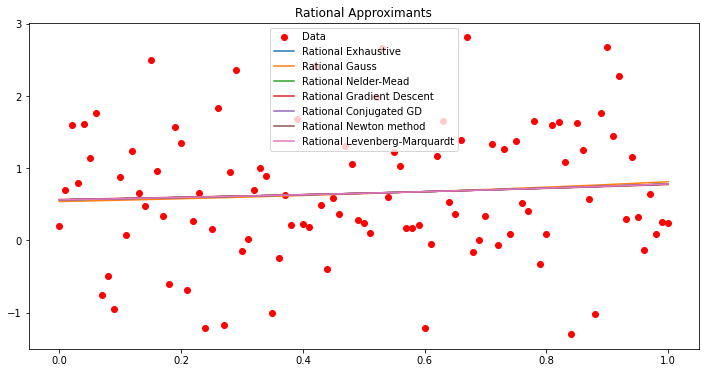

In [25]:
# For Rational Approximant
plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_data, a_exhaustive_rational / (1 + x_data * b_exhaustive_rational), label='Rational Exhaustive') 
plt.plot(x_data, a_gauss_rational / (1 + x_data * b_gauss_rational), label='Rational Gauss')  
plt.plot(x_data, result_rational_nelder.x[0] / (1 + x_data * result_rational_nelder.x[1]), label='Rational Nelder-Mead')
plt.plot(x_data, a_rational_vgd / (1 + b_rational_vgd * x_data), label='Rational Gradient Descent')
plt.plot(x_data, result_rational_cg.x[0] / (1 + result_rational_cg.x[1] * x_data), label='Rational Conjugated GD')
plt.plot(x_data, result_rational_newton.x[0] / (1 + result_rational_newton.x[1] * x_data), label='Rational Newton method')
plt.plot(x_data, result_rational_lm.x[0] / (1 + result_rational_lm.x[1] * x_data), label='Rational Levenberg-Marquardt')
plt.legend()
plt.title('Rational Approximants')
plt.show()

In [26]:
table_full_coef = pd.concat([table1, table3]).drop("Real values")
table_full_coef

,a_linear,b_linear,a_rational,b_rational
Real coeffs,0.220329,0.549603,0.561756,-0.281507
Exhaustive,0.220000,0.550000,0.562000,-0.281000
Gauss,0.278000,0.521000,0.539000,-0.337000
Nelder-Mead,0.220396,0.549550,0.561755,-0.281527
Vanilla GD,0.213000,0.554000,0.567000,-0.268000
Conjugated GD,0.220000,0.550000,0.562000,-0.282000
Newton's,0.220000,0.550000,0.562000,-0.282000
Levenberg-M,0.220000,0.550000,0.562000,-0.282000


In [27]:
table_full_info = pd.concat([table2, table4])
table_full_info

,iter_linear,f_eval_linear,iter_rational,f_eval_rational
Exhaustive,4004001,4004001,4004001,4004001
Gauss,458,916916,582,1165164
Nelder-Mead,60,115,60,115
Vanilla GD,43,43,55,55
Conjugated GD,2,15,10,75
Newton's,3,4,5,7
Levenberg-M,?,6,?,16
